In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.metrics import accuracy_score
from scipy import stats

In [2]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=20)

In [10]:
def ttest(res_1,res_2):
    stat, p_value = stats.ttest_ind(res_1, res_2)
    print("p value",p_value)
    return p_value

def significance_level(p_value):
    if p_value > 0.1:
        level = None
    elif (p_value <= 0.1) and (p_value > 0.05):
        level = '.'
    elif (p_value <= 0.05) and (p_value > 0.01):
        level = '*'
    elif (p_value <= 0.01) and (p_value > 0.001):
        level = '**'
    else:
        level = '***'
    return level

def add_bar(x_1,x_2,res_1,res_2,y,ax):
    """
    model_1,model_2 : int of the model tested
    ax : axis from matplotlib figure
    """
    ax.plot([x_1,x_1],[y+1,y+3],'k')
    ax.plot([x_1,x_2],[y+3,y+3],'k')
    ax.plot([x_2,x_2],[y+3,y+1],'k')

    ax.text((x_2-x_1)/2+x_1, y+3, significance_level(ttest(res_1,res_2)),
         {'color': 'black', 'fontsize': 14, 'ha': 'center', 'va': 'center',
          'bbox': dict( fc="white", ec="white", pad=2)})
    return y+5

In [11]:
with open('validation.json', 'r') as openfile:
    dict_acc = json.load(openfile)

In [12]:
dict_acc

{'MAR_RESNET34_PADDED_256_ALL_NEW': [0.981, 0.979, 0.989, 0.981, 0.981],
 'MAR_RESNET34_CROPPED_256_ALL_NEW': [0.904, 0.909, 0.897, 0.886, 0.931],
 'MAR_RESNET34_RESIZED_256_ALL_NEW': [0.98, 0.976, 0.983, 0.981, 0.983],
 'MAR_RESNET18_PADDED_256_ALL_NEW': [0.984, 0.979, 0.991, 0.982, 0.989],
 'MAR_RESNET18_PADDED_128_ALL_NEW': [0.968, 0.965, 0.979, 0.976, 0.972]}

In [13]:
lists = ['MAR_RESNET34_RESIZED_256_ALL_NEW','MAR_RESNET34_PADDED_256_ALL_NEW','MAR_RESNET34_CROPPED_256_ALL_NEW','MAR_RESNET18_PADDED_256_ALL_NEW',"MAR_RESNET18_PADDED_128_ALL_NEW"]

p value 0.48158486968195835
p value 8.443997352109662e-06
p value 0.34947827166710177
p value 0.004875680674273119


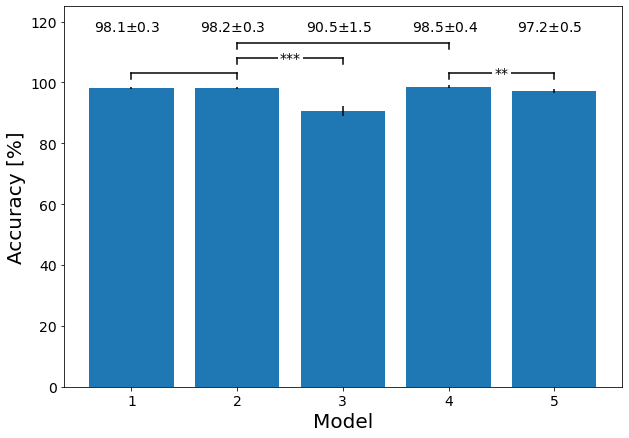

In [23]:
fig, ax = plt.subplots(figsize=(10,7))

pos = np.arange(1,6)

ax.bar(
    x=pos,
    height=pd.DataFrame.from_dict(dict_acc)[lists].mean(axis=0).values * 100,
    yerr=pd.DataFrame.from_dict(dict_acc)[lists].std(axis=0).values * 100
    ) 

tests = [
    ("MAR_RESNET34_RESIZED_256_ALL_NEW","MAR_RESNET34_PADDED_256_ALL_NEW"),
    ("MAR_RESNET34_PADDED_256_ALL_NEW","MAR_RESNET34_CROPPED_256_ALL_NEW"),
    ("MAR_RESNET34_PADDED_256_ALL_NEW","MAR_RESNET18_PADDED_256_ALL_NEW"),
    ("MAR_RESNET18_PADDED_256_ALL_NEW","MAR_RESNET18_PADDED_128_ALL_NEW")
]

y = 100 # where to start the bar
for i_, (model_1, model_2) in enumerate(np.array(tests)[[0,1,2]]) :

    x_1 = [lists.index(i) for i in lists if i == model_1][0] + 1
    x_2 = [lists.index(i) for i in lists if i == model_2][0] + 1

    res_1 = dict_acc[model_1]
    res_2 = dict_acc[model_2]

    y = add_bar(x_1,x_2,res_1,res_2,y,ax=ax)

y = 100 # where to start the bar
for i_, (model_1, model_2) in enumerate(np.array(tests)[[3]]) :

    x_1 = [lists.index(i) for i in lists if i == model_1][0] + 1
    x_2 = [lists.index(i) for i in lists if i == model_2][0] + 1

    res_1 = dict_acc[model_1]
    res_2 = dict_acc[model_2]

    y = add_bar(x_1,x_2,res_1,res_2,y,ax=ax)

for i_, model in enumerate(lists):
    plt.text(
        pos[i_]-0.35, 
        117, 
        f"{np.round(np.mean(dict_acc[model])*100,1)}$\pm${np.round(np.std(dict_acc[model])*100,1)}",
        fontdict={'fontsize':14})
plt.ylabel('Accuracy [%]')
plt.xlabel('Model') 

plt.ylim(0, 125)
plt.savefig("../FiguresPaper/model_selection_1.png",bbox_inches='tight')

p value 0.48158486968195835
p value 8.443997352109662e-06
p value 0.34947827166710177
p value 0.004875680674273119


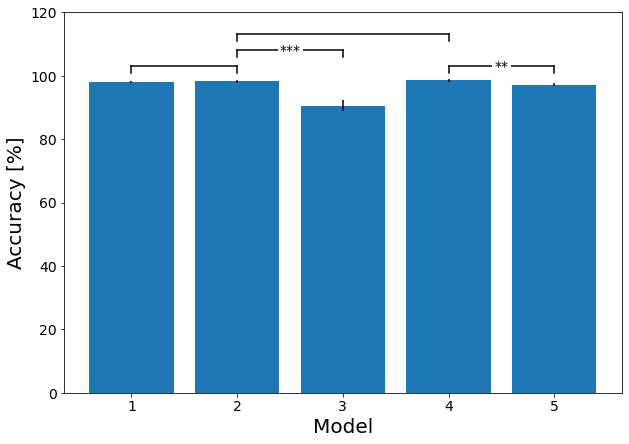

In [26]:
fig, ax = plt.subplots(figsize=(10,7))

pos = np.arange(1,6)

ax.bar(
    x=pos,
    height=pd.DataFrame.from_dict(dict_acc)[lists].mean(axis=0).values * 100,
    yerr=pd.DataFrame.from_dict(dict_acc)[lists].std(axis=0).values * 100
    ) 

tests = [
    ("MAR_RESNET34_RESIZED_256_ALL_NEW","MAR_RESNET34_PADDED_256_ALL_NEW"),
    ("MAR_RESNET34_PADDED_256_ALL_NEW","MAR_RESNET34_CROPPED_256_ALL_NEW"),
    ("MAR_RESNET34_PADDED_256_ALL_NEW","MAR_RESNET18_PADDED_256_ALL_NEW"),
    ("MAR_RESNET18_PADDED_256_ALL_NEW","MAR_RESNET18_PADDED_128_ALL_NEW")
]

y = 100 # where to start the bar
for i_, (model_1, model_2) in enumerate(np.array(tests)[[0,1,2]]) :

    x_1 = [lists.index(i) for i in lists if i == model_1][0] + 1
    x_2 = [lists.index(i) for i in lists if i == model_2][0] + 1

    res_1 = dict_acc[model_1]
    res_2 = dict_acc[model_2]

    y = add_bar(x_1,x_2,res_1,res_2,y,ax=ax)

y = 100 # where to start the bar
for i_, (model_1, model_2) in enumerate(np.array(tests)[[3]]) :

    x_1 = [lists.index(i) for i in lists if i == model_1][0] + 1
    x_2 = [lists.index(i) for i in lists if i == model_2][0] + 1

    res_1 = dict_acc[model_1]
    res_2 = dict_acc[model_2]

    y = add_bar(x_1,x_2,res_1,res_2,y,ax=ax)

plt.ylabel('Accuracy [%]')
plt.xlabel('Model') 

plt.ylim(0, 120)
plt.savefig("../FiguresPaper/model_selection_2.png",bbox_inches='tight')